In [93]:
import pandas as pd
import numpy as np
import scipy.stats as st
import string
#from tensorflow.keras.preprocessing.text import Tokenizer
#from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import nltk
import re
import multiprocessing
#import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
nltk.download("stopwords")

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acrai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [94]:
col_names = ["date","season","neutral","playoff","team1","team2","elo1_pre","elo2_pre","elo_prob1","elo_prob2","elo1_post","elo2_post","qbelo1_pre","qbelo2_pre","qb1","qb2","qb1_value_pre","qb2_value_pre","qb1_adj","qb2_adj","qbelo_prob1","qbelo_prob2","qb1_game_value","qb2_game_value","qb1_value_post","qb2_value_post","qbelo1_post","qbelo2_post","score1","score2","quality","importance","total_rating"]

df = pd.read_csv("https://projects.fivethirtyeight.com/nfl-api/nfl_elo.csv", names=col_names)

#Drop the first row
df = df.iloc[1:]
df = df.reset_index(drop=True)

In [95]:
#Display the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            17379 non-null  object
 1   season          17379 non-null  object
 2   neutral         17379 non-null  object
 3   playoff         616 non-null    object
 4   team1           17379 non-null  object
 5   team2           17379 non-null  object
 6   elo1_pre        17379 non-null  object
 7   elo2_pre        17379 non-null  object
 8   elo_prob1       17379 non-null  object
 9   elo_prob2       17379 non-null  object
 10  elo1_post       17379 non-null  object
 11  elo2_post       17379 non-null  object
 12  qbelo1_pre      15217 non-null  object
 13  qbelo2_pre      15217 non-null  object
 14  qb1             15217 non-null  object
 15  qb2             15217 non-null  object
 16  qb1_value_pre   15217 non-null  object
 17  qb2_value_pre   15217 non-null  object
 18  qb1_ad

In [96]:
#Display the first 5 rows of the dataframe
df.head(5)

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,quality,importance,total_rating
0,1920-09-26,1920,0,NaN,RII,STP,1503.947,1300.0,0.8246512009492516,0.1753487990507484,...,NaN,NaN,NaN,NaN,NaN,48,0,NaN,NaN,NaN
1,1920-10-03,1920,0,NaN,AKR,WHE,1503.42,1300.0,0.8242120973373386,0.17578790266266142,...,NaN,NaN,NaN,NaN,NaN,43,0,NaN,NaN,NaN
2,1920-10-03,1920,0,NaN,BFF,WBU,1478.004,1300.0,0.8020003005487033,0.1979996994512967,...,NaN,NaN,NaN,NaN,NaN,32,6,NaN,NaN,NaN
3,1920-10-03,1920,0,NaN,DAY,COL,1493.002,1504.908,0.5758191240920725,0.4241808759079275,...,NaN,NaN,NaN,NaN,NaN,14,0,NaN,NaN,NaN
4,1920-10-03,1920,0,NaN,RII,MUN,1516.108,1478.004,0.6441710901126361,0.35582890988736393,...,NaN,NaN,NaN,NaN,NaN,45,0,NaN,NaN,NaN


In [97]:
#List of columns
print(df.columns)

#Display the shape of the dataframe
print(df.shape)

#Display the first 5 rows of the dataframe
print(df.head())

#Display the last 5 rows of the dataframe
df.tail()

Index(['date', 'season', 'neutral', 'playoff', 'team1', 'team2', 'elo1_pre',
       'elo2_pre', 'elo_prob1', 'elo_prob2', 'elo1_post', 'elo2_post',
       'qbelo1_pre', 'qbelo2_pre', 'qb1', 'qb2', 'qb1_value_pre',
       'qb2_value_pre', 'qb1_adj', 'qb2_adj', 'qbelo_prob1', 'qbelo_prob2',
       'qb1_game_value', 'qb2_game_value', 'qb1_value_post', 'qb2_value_post',
       'qbelo1_post', 'qbelo2_post', 'score1', 'score2', 'quality',
       'importance', 'total_rating'],
      dtype='object')
(17379, 33)
         date season neutral playoff team1 team2  elo1_pre  elo2_pre  \
0  1920-09-26   1920       0     NaN   RII   STP  1503.947    1300.0   
1  1920-10-03   1920       0     NaN   AKR   WHE   1503.42    1300.0   
2  1920-10-03   1920       0     NaN   BFF   WBU  1478.004    1300.0   
3  1920-10-03   1920       0     NaN   DAY   COL  1493.002  1504.908   
4  1920-10-03   1920       0     NaN   RII   MUN  1516.108  1478.004   

            elo_prob1            elo_prob2  ... qb2_game_v

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,quality,importance,total_rating
17374,2023-01-22,2022,0,d,BUF,CIN,1731.516093,1690.292481,0.648277,0.351723,...,303.726984,225.069808,230.466056,1675.57077,1690.152492,10,27,99,100.0,100.0
17375,2023-01-22,2022,0,d,SF,DAL,1708.971847,1640.135262,0.683613,0.316387,...,105.114287,109.133365,191.883277,1719.153115,1619.647034,19,12,98,100.0,99.0
17376,2023-01-29,2022,0,c,PHI,SF,1621.987292,1721.375447,0.450672,0.549328,...,56.917741,246.82674,103.911803,1645.507079,1693.213858,31,7,99,100.0,100.0
17377,2023-01-29,2022,0,c,KC,CIN,1735.804844,1729.668918,0.600966,0.399034,...,28.185998,280.177715,210.23805,1708.664922,1678.80582,23,20,100,100.0,100.0
17378,2023-02-12,2022,1,s,PHI,KC,1657.913193,1746.521889,0.375176,0.624824,...,411.098145,268.147365,293.269758,1633.804536,1720.367465,35,38,100,100.0,100.0


In [98]:
#Preprocessing
#Copy the original dataframe to a new dataframe
qbelo_prob_df = df.copy()

#Drop rows with NaN values in qbelo1_pre and qbelo2_pre
qbelo_prob_df = qbelo_prob_df.dropna(subset=["qbelo1_pre", "qbelo2_pre"])

#Convert the date column to datetime
qbelo_prob_df["date"] = pd.to_datetime(qbelo_prob_df ["date"])

#Convert Score1 and Score2 to int
qbelo_prob_df["score1"] = qbelo_prob_df ["score1"].astype(int)
qbelo_prob_df["score2"] = qbelo_prob_df ["score2"].astype(int)

#Drop columns where qbelo_prob1 and qbelo_prob2 are NaN
qbelo_prob_df = qbelo_prob_df.dropna(subset=["qbelo_prob1", "qbelo_prob2"])

#convert qbelo_prob1 and qbelo_prob2 to float
qbelo_prob_df["qbelo_prob1"] = qbelo_prob_df["qbelo_prob1"].astype(float)
qbelo_prob_df["qbelo_prob2"] = qbelo_prob_df["qbelo_prob2"].astype(float)

#Add a new column "winner" to the dataframe
qbelo_prob_df["winner"] = np.where(qbelo_prob_df["score1"] > qbelo_prob_df["score2"], 1, 2)

qbelo_prob_df.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,quality,importance,total_rating,winner
2162,1950-09-16,1950,0,NaN,PHI,CLE,1674.314,1647.304,0.6294019745620898,0.3705980254379102,...,-12.308999999999997,27.522,1630.61302567,1685.82727987,10,35,98,NaN,NaN,2
2163,1950-09-17,1950,0,NaN,BCL,WSH,1337.541,1454.448,0.42585068548043653,0.5741493145195635,...,0.36300000000000004,25.179,1310.86767146,1481.48745545,14,38,6,NaN,NaN,2
2164,1950-09-17,1950,0,NaN,PIT,NYG,1485.849,1461.717,0.6255294000642098,0.37447059993579024,...,-3.4979999999999998,-5.411999999999999,1454.11872911,1493.9886024,7,18,35,NaN,NaN,2
2165,1950-09-17,1950,0,NaN,GB,DET,1353.646,1449.128,0.45624508306368117,0.5437549169363188,...,-3.762,11.517,1322.44168728,1481.66175657,7,45,7,NaN,NaN,2
2166,1950-09-17,1950,0,NaN,LAR,CHI,1564.606,1628.688,0.5013211051227595,0.4986788948772405,...,-1.2209999999999999,-3.0029999999999997,1549.2268171,1643.79896515,20,24,88,NaN,NaN,2


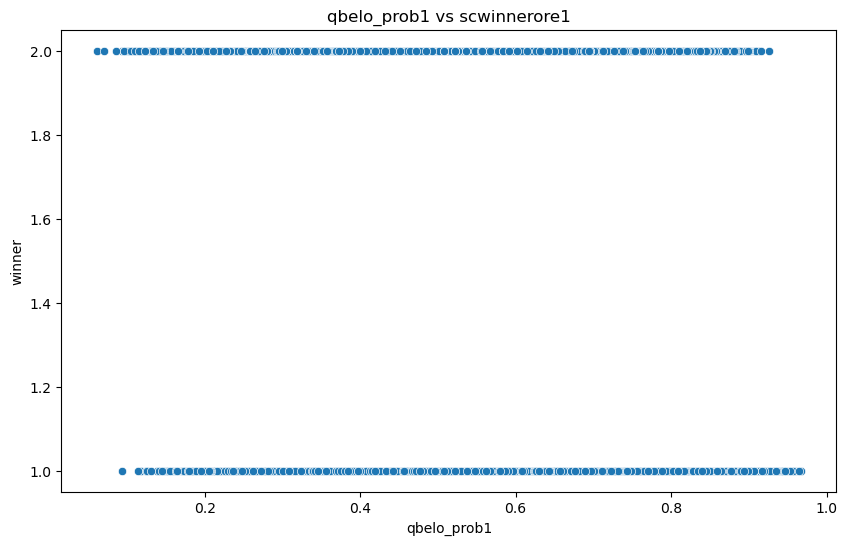

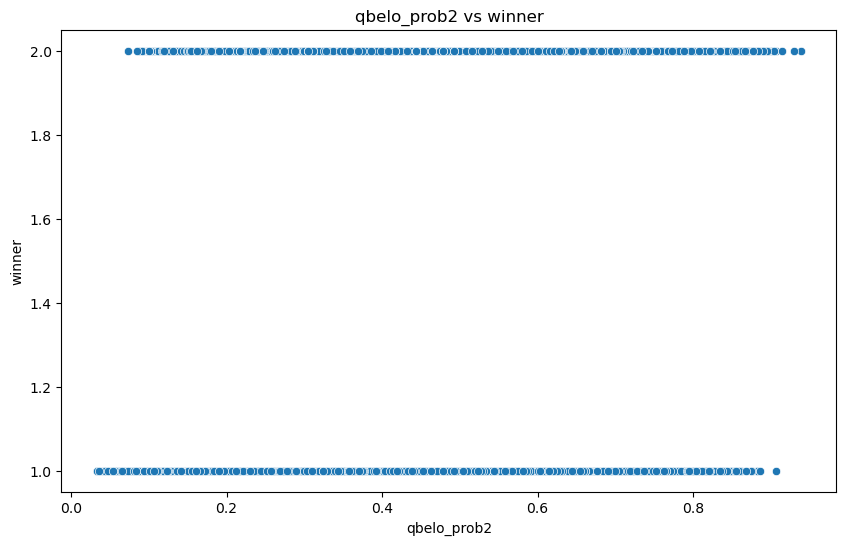

In [99]:
#Plot the distribution of qbelo_prob1 against winner
plt.figure(figsize=(10, 6))
sns.scatterplot(x="qbelo_prob1", y="winner", data=qbelo_prob_df)
plt.title("qbelo_prob1 vs scwinnerore1")
plt.xlabel("qbelo_prob1")
plt.ylabel("winner")
plt.show()

#Plot the distribution of qbelo_prob2 against winnning team
plt.figure(figsize=(10, 6))
sns.scatterplot(x="qbelo_prob2", y="winner", data=qbelo_prob_df)
plt.title("qbelo_prob2 vs winner")
plt.xlabel("qbelo_prob2")
plt.ylabel("winner")
plt.show()


In [100]:
#Show correlation between qbelo1 and winner
print(qbelo_prob_df[["qbelo1_pre", "winner"]].corr())

#Show correlation between qbelo2 and winner
print(qbelo_prob_df[["qbelo2_pre", "winner"]].corr())

#Show the correlation between elo1_pre and winner
print(qbelo_prob_df[["elo1_pre", "winner"]].corr())

#Show the correlation between elo2_pre and winner
print(qbelo_prob_df[["elo2_pre", "winner"]].corr())

#Show the correlation between qbelo_prob1 and winner
print(qbelo_prob_df[["qbelo_prob1", "winner"]].corr())

#Show the correlation between qbelo_prob2 and winner
print(qbelo_prob_df[["qbelo_prob2", "winner"]].corr())

#Compare the Pearson correlation between qbelo_prob1 and winner
print(qbelo_prob_df[["qbelo_prob1", "winner"]].corr(method="pearson"))

#Compare the Pearson correlation between qbelo_prob2 and winner
print(qbelo_prob_df[["qbelo_prob2", "winner"]].corr(method="pearson"))






            qbelo1_pre    winner
qbelo1_pre    1.000000 -0.241384
winner       -0.241384  1.000000
            qbelo2_pre    winner
qbelo2_pre    1.000000  0.219159
winner        0.219159  1.000000
          elo1_pre   winner
elo1_pre   1.00000 -0.24006
winner    -0.24006  1.00000
          elo2_pre   winner
elo2_pre   1.00000  0.21705
winner     0.21705  1.00000
             qbelo_prob1    winner
qbelo_prob1     1.000000 -0.348579
winner         -0.348579  1.000000
             qbelo_prob2    winner
qbelo_prob2     1.000000  0.348579
winner          0.348579  1.000000
             qbelo_prob1    winner
qbelo_prob1     1.000000 -0.348579
winner         -0.348579  1.000000
             qbelo_prob2    winner
qbelo_prob2     1.000000  0.348579
winner          0.348579  1.000000


In [101]:
#Create a new dataframe with the date, qbelo_prob1 and qbelo_prob2 columns and the score1 and score2 columns
qbelo_prob_df = qbelo_prob_df[["date", "qbelo_prob1", "qbelo_prob2", "score1", "score2"]]

#Create a new column called "winner" and set it to 1 if score1 > score2, 2 if score2 > score1 and 0 if score1 = score2
qbelo_prob_df["winner"] = np.where(qbelo_prob_df["score1"] > qbelo_prob_df["score2"], 1, np.where(qbelo_prob_df["score2"] > qbelo_prob_df["score1"], 2, 0))

#Drop the score1 and score2 columns
qbelo_prob_df = qbelo_prob_df.drop(columns=["score1", "score2"])

#drop rows with no winner
qbelo_prob_df = qbelo_prob_df[qbelo_prob_df["winner"] != 0]



qbelo_prob_df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 15069 entries, 2162 to 17378
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         15069 non-null  datetime64[ns]
 1   qbelo_prob1  15069 non-null  float64       
 2   qbelo_prob2  15069 non-null  float64       
 3   winner       15069 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1)
memory usage: 529.8 KB


In [102]:
#Predicting the winner
#Split the dataframe into features and target
X = qbelo_prob_df[["qbelo_prob1", "qbelo_prob2"]]
y = qbelo_prob_df["winner"]

#Split the data into training and testing sets
#Create a loop to test different test sizes and random states
for i in range(1, 11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Random state: {i} - Accuracy: {accuracy}")


qbelo_prob_df.head()



Random state: 1 - Accuracy: 0.6640127388535032
Random state: 2 - Accuracy: 0.6780785562632696
Random state: 3 - Accuracy: 0.6568471337579618
Random state: 4 - Accuracy: 0.6526008492569002
Random state: 5 - Accuracy: 0.6671974522292994
Random state: 6 - Accuracy: 0.6616242038216561
Random state: 7 - Accuracy: 0.6592356687898089
Random state: 8 - Accuracy: 0.6624203821656051
Random state: 9 - Accuracy: 0.6621549893842887
Random state: 10 - Accuracy: 0.6605626326963907


,date,qbelo_prob1,qbelo_prob2,winner
2162,1950-09-16,0.620653,0.379347,2
2163,1950-09-17,0.425357,0.574643,2
2164,1950-09-17,0.612587,0.387413,2
2165,1950-09-17,0.443900,0.556100,2
2166,1950-09-17,0.498518,0.501482,2


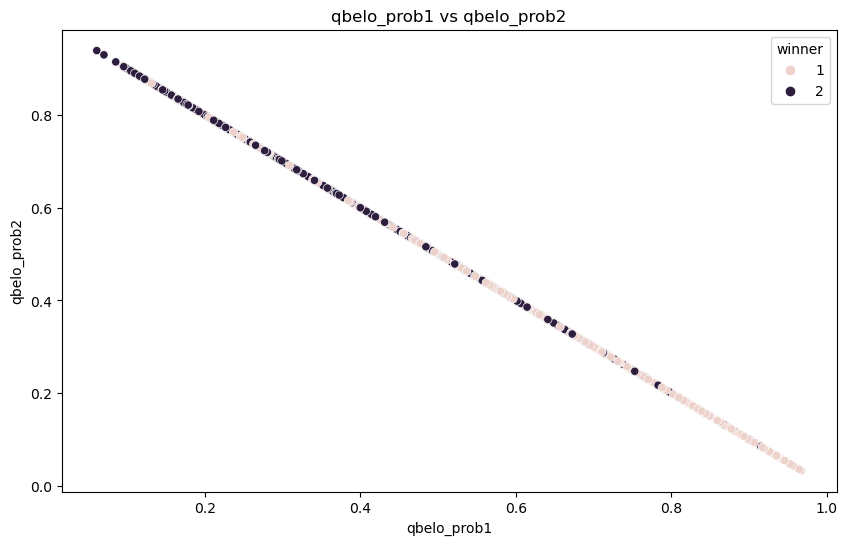

In [103]:
#Chart how the model predicts the winner
plt.figure(figsize=(10, 6))
sns.scatterplot(x="qbelo_prob1", y="qbelo_prob2", hue="winner", data=qbelo_prob_df)
plt.title("qbelo_prob1 vs qbelo_prob2")
plt.xlabel("qbelo_prob1")
plt.ylabel("qbelo_prob2")
plt.show()

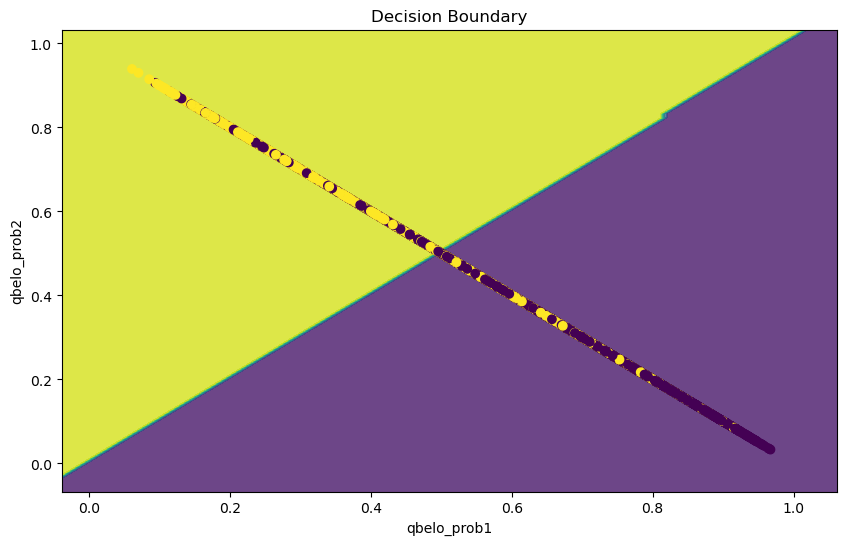

In [104]:
#Chart the decision boundary
#Create a meshgrid
x_min, x_max = X["qbelo_prob1"].min() - 0.1, X["qbelo_prob1"].max() + 0.1
y_min, y_max = X["qbelo_prob2"].min() - 0.1, X["qbelo_prob2"].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

#Predict the class
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X["qbelo_prob1"], X["qbelo_prob2"], c=y, cmap="viridis")
plt.title("Decision Boundary")
plt.xlabel("qbelo_prob1")
plt.ylabel("qbelo_prob2")
plt.show()



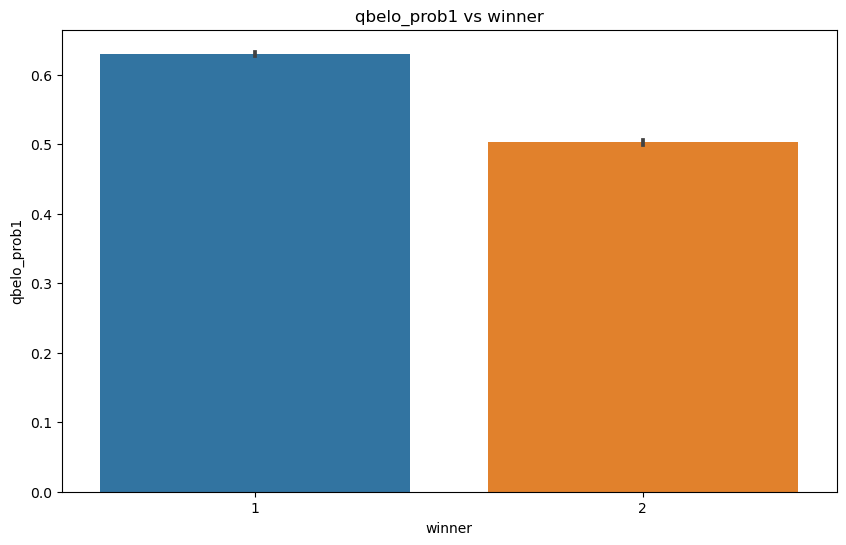

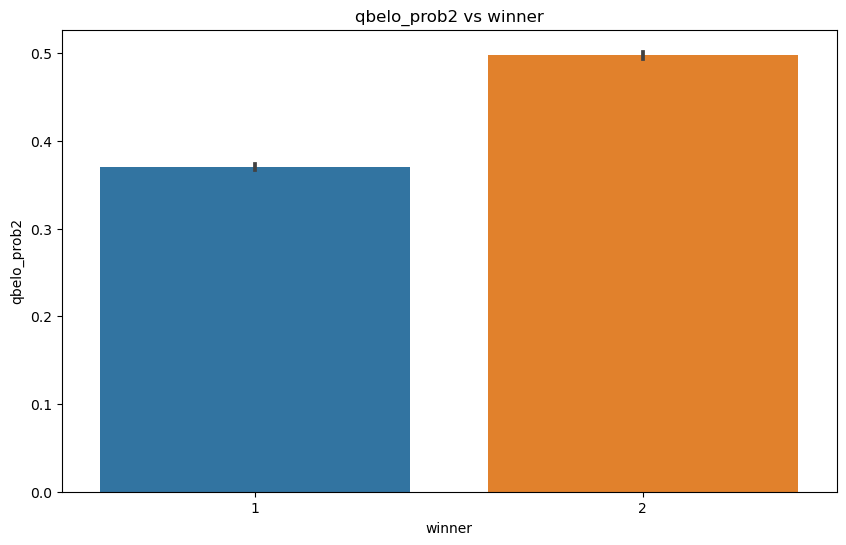

In [105]:
#Show a bar chart of qbelo_prob1 and qbelo_prob2
plt.figure(figsize=(10, 6))
sns.barplot(x="winner", y="qbelo_prob1", data=qbelo_prob_df)
plt.title("qbelo_prob1 vs winner")
plt.xlabel("winner")
plt.ylabel("qbelo_prob1")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x="winner", y="qbelo_prob2", data=qbelo_prob_df)
plt.title("qbelo_prob2 vs winner")
plt.xlabel("winner")
plt.ylabel("qbelo_prob2")
plt.show()




In [106]:
#Create a copy of the original dataframe with the columns "date", "elo_prob1", "elo_prob2", "qbelo_prob1", "qbelo_prob2", qbelo1_pre, qbelo2_pre, "score1" and "score2"
total_elo_prob_df = df[["date", "elo_prob1", "elo_prob2", "qbelo_prob1", "qbelo_prob2", "qbelo1_pre", "qbelo2_pre", "score1", "score2"]]

#Drop rows with NaN values in elo_prob1 and elo_prob2 and qbelo_prob1 and qbelo_prob2
total_elo_prob_df = total_elo_prob_df.dropna(subset=["elo_prob1", "elo_prob2", "qbelo_prob1", "qbelo_prob2"])

#Convert the date column to datetime
total_elo_prob_df["date"] = pd.to_datetime(total_elo_prob_df["date"])

#Convert Score1 and Score2 to int
total_elo_prob_df["score1"] = total_elo_prob_df["score1"].astype(int)
total_elo_prob_df["score2"] = total_elo_prob_df["score2"].astype(int)

#convert elo_prob1 and elo_prob2 to float
total_elo_prob_df["elo_prob1"] = total_elo_prob_df["elo_prob1"].astype(float)
total_elo_prob_df["elo_prob2"] = total_elo_prob_df["elo_prob2"].astype(float)

#Convert qbelo_prob1 and qbelo_prob2 to float
total_elo_prob_df["qbelo_prob1"] = total_elo_prob_df["qbelo_prob1"].astype(float)
total_elo_prob_df["qbelo_prob2"] = total_elo_prob_df["qbelo_prob2"].astype(float)

#Create a column called total_elo_prob1 and set it to (elo_prob1 + qbelo_prob1) - (elo_prob1 * qbelo_prob1)
total_elo_prob_df["total_elo_prob1"] = (total_elo_prob_df["elo_prob1"] + total_elo_prob_df["qbelo_prob1"]) - (total_elo_prob_df["elo_prob1"] * total_elo_prob_df["qbelo_prob1"])

#Create a column called total_elo_prob2 and set it to (elo_prob2 + qbelo_prob2) - (elo_prob1 * qbelo_prob2)
total_elo_prob_df["total_elo_prob2"] = (total_elo_prob_df["elo_prob2"] + total_elo_prob_df["qbelo_prob2"]) - (total_elo_prob_df["elo_prob2"] * total_elo_prob_df["qbelo_prob2"])


#Create a new column called "winner" and set it to 1 if score1 > score2, 2 if score2 > score1 and 0 if score1 = score2
total_elo_prob_df["winner"] = np.where(total_elo_prob_df["score1"] > total_elo_prob_df["score2"], 1, np.where(total_elo_prob_df["score2"] > total_elo_prob_df["score1"], 2, 0))

#Drop the score1 and score2 columns
total_elo_prob_df = total_elo_prob_df.drop(columns=["score1", "score2"])

#drop rows with no winner
total_elo_prob_df = total_elo_prob_df[total_elo_prob_df["winner"] != 0]

#Drop columns other than "Date", "total_elo_prob1", "total_elo_prob2", qbelo1_pre, qbelo2_pre and "winner"
total_elo_prob_df = total_elo_prob_df[["date", "total_elo_prob1", "total_elo_prob2", "qbelo1_pre", "qbelo2_pre", "winner"]]

#Split the dataframe into features and target
X = total_elo_prob_df[["total_elo_prob1", "total_elo_prob2", "qbelo1_pre", "qbelo2_pre"]]
y = total_elo_prob_df["winner"]

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

#Create a logistic regression model
log_reg = LogisticRegression()

#Train the model
log_reg.fit(X_train, y_train)

#Make predictions
y_pred = log_reg.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

total_elo_prob_df.head(100)


Accuracy: 0.684447983014862


,date,total_elo_prob1,total_elo_prob2,qbelo1_pre,qbelo2_pre,winner
2162,1950-09-16,0.859415,0.609360,1672.67137427,1643.76893127,2
2163,1950-09-17,0.670069,0.818862,1337.6325851,1454.72254181,2
2164,1950-09-17,0.854925,0.616809,1485.7017011,1462.40563041,2
2165,1950-09-17,0.697618,0.797473,1354.3999332,1449.70351065,2
2166,1950-09-17,0.749921,0.750083,1564.94180775,1628.0839745,2
...,...,...,...,...,...,...
2258,1951-10-14,0.981856,0.251258,1647.11474025,1397.06717289,1
2259,1951-10-14,0.461945,0.929003,1371.89864748,1611.0209433,1
2260,1951-10-14,0.845235,0.632046,1499.66273481,1483.26931084,2
2261,1951-10-21,0.868082,0.594785,1605.41547585,1569.46751356,1


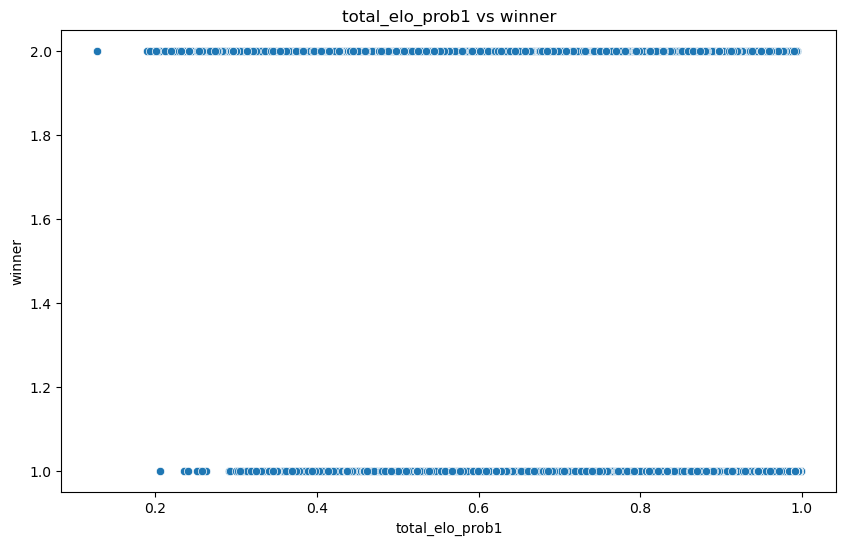

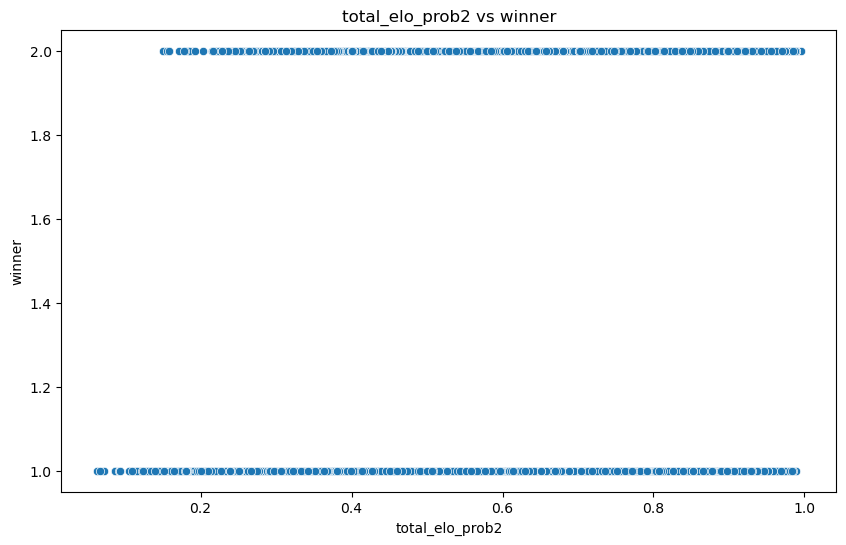

Correlation between total_elo_prob1 and winner: -0.34
Correlation between total_elo_prob2 and winner: 0.35


In [107]:
#Chart the distribution of total_elo_prob1 against the winning team
plt.figure(figsize=(10, 6))
sns.scatterplot(x="total_elo_prob1", y="winner", data=total_elo_prob_df)
plt.title("total_elo_prob1 vs winner")
plt.xlabel("total_elo_prob1")
plt.ylabel("winner")
plt.show()

#Chart the distribution of total_elo_prob2 against the winning team
plt.figure(figsize=(10, 6))
sns.scatterplot(x="total_elo_prob2", y="winner", data=total_elo_prob_df)
plt.title("total_elo_prob2 vs winner")
plt.xlabel("total_elo_prob2")
plt.ylabel("winner")
plt.show()

#Show the correlation between total_elo_prob1 and winner
corr1 = st.pearsonr(total_elo_prob_df["total_elo_prob1"], total_elo_prob_df["winner"])

print(f"Correlation between total_elo_prob1 and winner: {round(corr1[0],2)}")

#Show the correlation between total_elo_prob2 and winner
corr2 = st.pearsonr(total_elo_prob_df["total_elo_prob2"], total_elo_prob_df["winner"])

print(f"Correlation between total_elo_prob2 and winner: {round(corr2[0],2)}")





In [108]:
#Create a copy of the original dataframe with the columns "date", "elo1_pre", "elo2_pre", "qbelo1_pre", "qbelo2_pre", "score1" and "score2"
total_elo_df = df[["date", "elo1_pre", "elo2_pre", "qbelo1_pre", "qbelo2_pre", "score1", "score2"]]

#Drop rows with NaN values in elo1_pre, elo2_pre, qbelo1_pre and qbelo2_pre
total_elo_df = total_elo_df.dropna(subset=["elo1_pre", "elo2_pre", "qbelo1_pre", "qbelo2_pre"])

#Convert the date column to datetime
total_elo_df["date"] = pd.to_datetime(total_elo_df["date"])

#Convert Score1 and Score2 to int
total_elo_df["score1"] = total_elo_df["score1"].astype(int)
total_elo_df["score2"] = total_elo_df["score2"].astype(int)

#convert elo1_pre and elo2_pre to float
total_elo_df["elo1_pre"] = total_elo_df["elo1_pre"].astype(float)
total_elo_df["elo2_pre"] = total_elo_df["elo2_pre"].astype(float)

#Convert qbelo1_pre and qbelo2_pre to float
total_elo_df["qbelo1_pre"] = total_elo_df["qbelo1_pre"].astype(float)
total_elo_df["qbelo2_pre"] = total_elo_df["qbelo2_pre"].astype(float)


#Create a new column called "winner" and set it to 1 if score1 > score2, 2 if score2 > score1 and 0 if score1 = score2
total_elo_df["winner"] = np.where(total_elo_df["score1"] > total_elo_df["score2"], 1, np.where(total_elo_df["score2"] > total_elo_df["score1"], 2, 0))

#Drop the score1 and score2 columns
total_elo_df = total_elo_df.drop(columns=["score1", "score2"])

#drop rows with no winner
total_elo_df = total_elo_df[total_elo_df["winner"] != 0]

#Drop columns other than "Date", "elo1_pre", "elo2_pre", "qbelo1_pre", "qbelo2_pre" and "winner"
total_elo_df = total_elo_df[["date", "elo1_pre", "elo2_pre", "qbelo1_pre", "qbelo2_pre", "winner"]]
total_elo_df.head(100)



,date,elo1_pre,elo2_pre,qbelo1_pre,qbelo2_pre,winner
2162,1950-09-16,1674.314,1647.304,1672.671374,1643.768931,2
2163,1950-09-17,1337.541,1454.448,1337.632585,1454.722542,2
2164,1950-09-17,1485.849,1461.717,1485.701701,1462.405630,2
2165,1950-09-17,1353.646,1449.128,1354.399933,1449.703511,2
2166,1950-09-17,1564.606,1628.688,1564.941808,1628.083975,2
...,...,...,...,...,...,...
2258,1951-10-14,1654.842,1395.538,1647.114740,1397.067173,1
2259,1951-10-14,1365.135,1608.840,1371.898647,1611.020943,1
2260,1951-10-14,1496.751,1485.312,1499.662735,1483.269311,2
2261,1951-10-21,1606.750,1566.520,1605.415476,1569.467514,1


In [109]:
#Split the dataframe into features and target
X = total_elo_df[["elo1_pre", "elo2_pre", "qbelo1_pre", "qbelo2_pre"]]
y = total_elo_df["winner"]

#Split the data into training and testing sets
#Create a loop to test different random states
for i in range(1, 11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)

    #Create a logistic regression model
    log_reg = LogisticRegression()

    #Train the model
    log_reg.fit(X_train, y_train)

    #Make predictions
    y_pred = log_reg.predict(X_test)

    #Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for random state {i}: {accuracy}")

    #Store the best accuracy and random state
    if i == 1:
        lof_reg_best_accuracy = accuracy
        log_reg_best_random_state = i
    elif accuracy > lof_reg_best_accuracy:
        lof_reg_best_accuracy = accuracy
        log_reg_best_random_state = i

Accuracy for random state 1: 0.6637473460721869
Accuracy for random state 2: 0.6820594479830149
Accuracy for random state 3: 0.6496815286624203
Accuracy for random state 4: 0.6533970276008493
Accuracy for random state 5: 0.660031847133758
Accuracy for random state 6: 0.6533970276008493
Accuracy for random state 7: 0.6571125265392781
Accuracy for random state 8: 0.6589702760084926
Accuracy for random state 9: 0.6632165605095541
Accuracy for random state 10: 0.6499469214437368


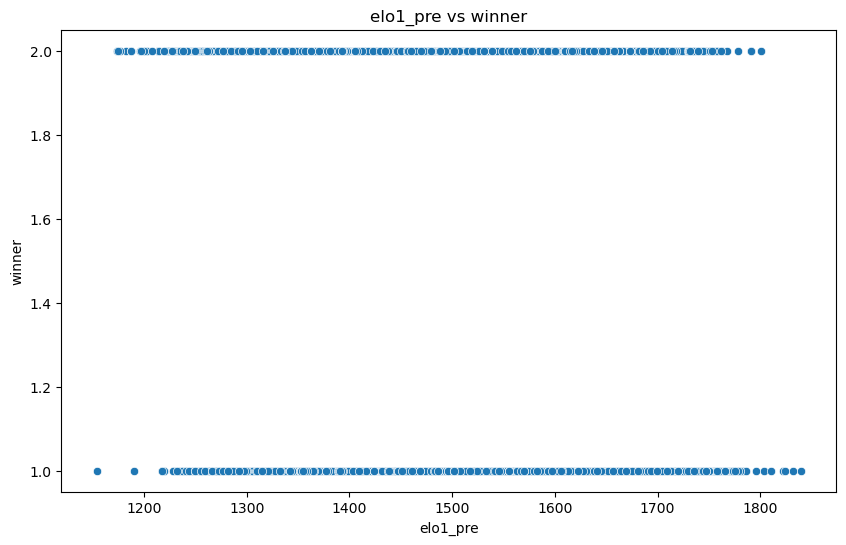

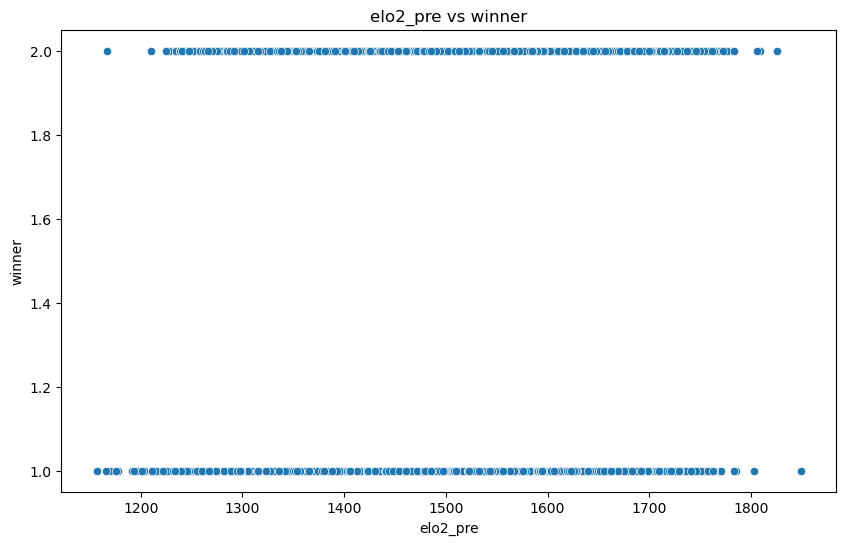

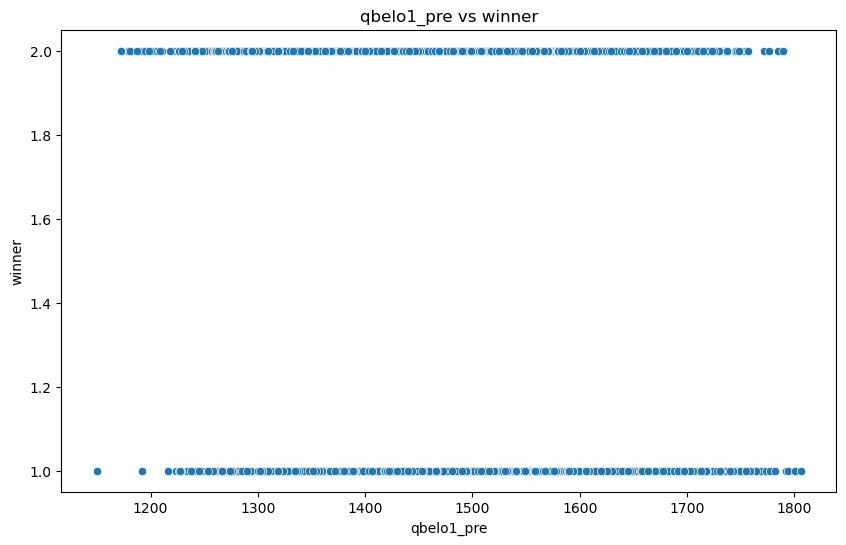

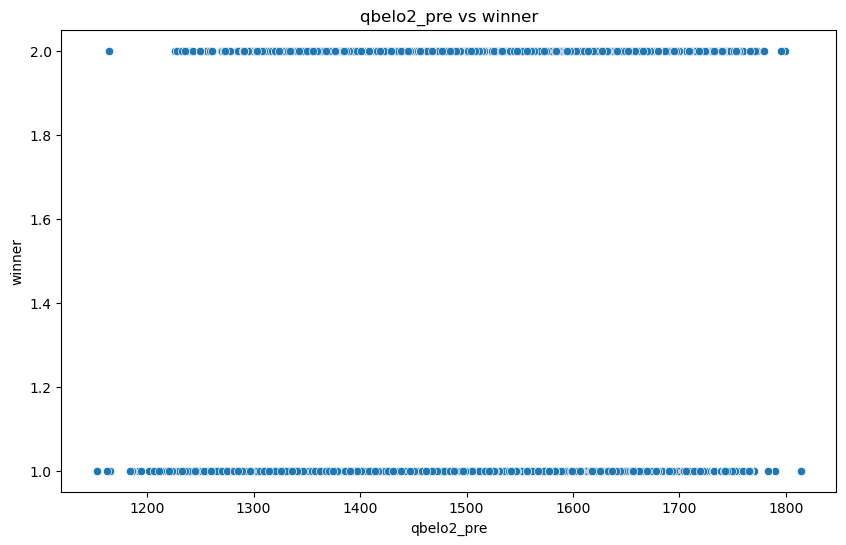

Correlation between elo1_pre and winner: -0.24
Correlation between elo2_pre and winner: 0.22


In [110]:
#Chart the distribution of elo1_pre against the winning team
plt.figure(figsize=(10, 6))
sns.scatterplot(x="elo1_pre", y="winner", data=total_elo_df)
plt.title("elo1_pre vs winner")
plt.xlabel("elo1_pre")
plt.ylabel("winner")
plt.show()

#Chart the distribution of elo2_pre against the winning team
plt.figure(figsize=(10, 6))
sns.scatterplot(x="elo2_pre", y="winner", data=total_elo_df)
plt.title("elo2_pre vs winner")
plt.xlabel("elo2_pre")
plt.ylabel("winner")
plt.show()

#Chart the distribution of qbelo1_pre against the winning team
plt.figure(figsize=(10, 6))
sns.scatterplot(x="qbelo1_pre", y="winner", data=total_elo_df)
plt.title("qbelo1_pre vs winner")
plt.xlabel("qbelo1_pre")
plt.ylabel("winner")
plt.show()

#Chart the distribution of qbelo2_pre against the winning team
plt.figure(figsize=(10, 6))
sns.scatterplot(x="qbelo2_pre", y="winner", data=total_elo_df)
plt.title("qbelo2_pre vs winner")
plt.xlabel("qbelo2_pre")
plt.ylabel("winner")
plt.show()

#Show the correlation between elo1_pre and winner
corr1 = st.pearsonr(total_elo_df["elo1_pre"], total_elo_df["winner"])

print(f"Correlation between elo1_pre and winner: {round(corr1[0],2)}")

#Show the correlation between elo2_pre and winner
corr2 = st.pearsonr(total_elo_df["elo2_pre"], total_elo_df["winner"])

print(f"Correlation between elo2_pre and winner: {round(corr2[0],2)}")



In [111]:
#Using elo_total_df to predict the winner with decision tree
#Split the dataframe into features and target
X = total_elo_df[["elo1_pre", "elo2_pre", "qbelo1_pre", "qbelo2_pre"]]
y = total_elo_df["winner"]

#Loop through different random states to find the best accuracy
for i in range(1, 11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)

    #Create a decision tree model
    dec_tree = DecisionTreeClassifier()

    #Train the model
    dec_tree.fit(X_train, y_train)

    #Make predictions
    y_pred = dec_tree.predict(X_test)

    #Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for random state {i}: {accuracy}")

    #Store the best accuracy and random state
    if i == 1:
        dec_tree_best_accuracy = accuracy
        dec_tree_best_random_state = i
    elif accuracy > dec_tree_best_accuracy:
        dec_tree_best_accuracy = accuracy
        dec_tree_best_random_state = i


Accuracy for random state 1: 0.5613057324840764
Accuracy for random state 2: 0.5631634819532909
Accuracy for random state 3: 0.571656050955414
Accuracy for random state 4: 0.5615711252653928
Accuracy for random state 5: 0.5682059447983014
Accuracy for random state 6: 0.5554670912951167
Accuracy for random state 7: 0.5597133757961783
Accuracy for random state 8: 0.5751061571125266
Accuracy for random state 9: 0.5697983014861996
Accuracy for random state 10: 0.5589171974522293


In [112]:
#Using qbelo_prob_df to predict the winner with random forest
#Split the dataframe into features and target
X = qbelo_prob_df[["qbelo_prob1", "qbelo_prob2"]]
y = qbelo_prob_df["winner"]

#Loop through different random states to find the best accuracy
for i in range(1, 11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)

    #Create a decision tree model
    rf_model1 = RandomForestClassifier(n_estimators=1000)

    #Train the model
    rf_model1.fit(X_train, y_train)

    #Make predictions
    y_pred = rf_model1.predict(X_test)

    #Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for random state {i}: {accuracy}")

    #Store the best accuracy and random state
    if i == 1:
        rf_model1_best_accuracy = accuracy
        rf_model1_best_random_state = i
    elif accuracy > rf_model1_best_accuracy:
        rf_model1_best_accuracy = accuracy
        drf_model1_best_random_state = i

Accuracy for random state 1: 0.5663481953290871
Accuracy for random state 2: 0.5788216560509554
Accuracy for random state 3: 0.5658174097664543
Accuracy for random state 4: 0.571656050955414
Accuracy for random state 5: 0.5700636942675159
Accuracy for random state 6: 0.5719214437367304
Accuracy for random state 7: 0.5687367303609342
Accuracy for random state 8: 0.564755838641189
Accuracy for random state 9: 0.5745753715498938
Accuracy for random state 10: 0.5751061571125266


In [113]:
#Using total_elo_prob_df to predict the winner with random forest

#Split the dataframe into features and target
X = total_elo_prob_df[["total_elo_prob1", "total_elo_prob2", "qbelo1_pre", "qbelo2_pre"]]
y = total_elo_prob_df["winner"]

#Loop through different random states to find the best accuracy
for i in range(1, 11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)

    #Create a random forest model
    rf_model2 = RandomForestClassifier()

    #Train the model
    rf_model2.fit(X_train, y_train)

    #Make predictions
    y_pred = rf_model2.predict(X_test)

    #Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for random state {i}: {accuracy}")

    #Store the best accuracy and random state
    if i == 1:
        rf_model2_best_accuracy = accuracy
        rf_model2_best_random_state = i
    elif accuracy > rf_model2_best_accuracy:
        rf_model2_best_accuracy = accuracy
        rf_model2_best_random_state = i

Accuracy for random state 1: 0.6263269639065817
Accuracy for random state 2: 0.6252653927813163
Accuracy for random state 3: 0.60828025477707
Accuracy for random state 4: 0.6149150743099787
Accuracy for random state 5: 0.6194267515923567
Accuracy for random state 6: 0.6027070063694268
Accuracy for random state 7: 0.6199575371549894
Accuracy for random state 8: 0.6125265392781316
Accuracy for random state 9: 0.6284501061571125
Accuracy for random state 10: 0.6138535031847133


<Axes: >

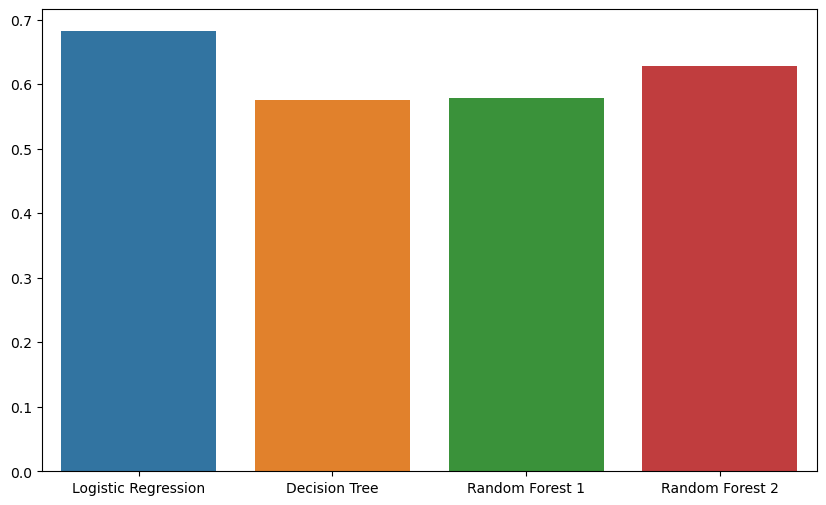

In [114]:
#Create a bar chart of the best accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=["Logistic Regression", "Decision Tree", "Random Forest 1", "Random Forest 2"], y=[lof_reg_best_accuracy, dec_tree_best_accuracy, rf_model1_best_accuracy, rf_model2_best_accuracy])